- Choose any imbalanced dataset # DONE

- Apply any needed preprocessing # DONE

- Apply Resampling on this dataset (both undersampling then oversampling ) # DONE 

- Choose Two Ensemble models ( one Bagging and one boosting )

- Train each model on the processed data 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model

- Optimize the two models by choose different parameters to get better results 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model for the optimized models

- Submit The Code (.py or .ipynb)

- Work on Groups (Only Two or three is allowed for each group, don't work alone)

- Their will be a discussion for your code

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import RandomUnderSampler




## Reading and inspection the data

In [2]:

df = pd.read_csv("dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
#checking for misinput vales
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['No' 'Yes']
work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type: ['Rural' 'Urban']
smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### The Min age is less than one , lets explore these more

In [10]:
df[(df["age"] < 1) & (df["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [13]:
df[df["age"] < 1]["heart_disease"].value_counts()


heart_disease
0    496
Name: count, dtype: int64

In [16]:
print(df[df["age"] < 1]["bmi"].min() , df[df["age"] < 1]["bmi"].max())

10.6 33.1


#### however by reasearch , we dont usually count the bmi for babies ,bmi is calculated as weight (in kilograms) divided by the square of height (in meters), and it is commonly used for older children, adolescents, and adults to assess body composition and risk factors for various health conditions. , so the values above seem unusually high

In [17]:
# Summary statistics for all columns including non-numerical
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [19]:
df.isnull().sum().sum()


14754

In [26]:
def nan_values(df):
    nan_count=df.isna().sum().sort_values(ascending=False)
    nan_percentage = (nan_count / df.shape[0])*100
    nans = pd.concat([nan_count, nan_percentage],axis = 1).reset_index()
    nans.rename(columns={0:'Nan count' , 1:'Nan Percentage'},inplace=True)
    return nans
nan_values(df)

,index,Nan count,Nan Percentage
0,smoking_status,13292,30.626728
1,bmi,1462,3.368664
2,id,0,0.000000
3,gender,0,0.000000
4,age,0,0.000000
5,hypertension,0,0.000000
6,heart_disease,0,0.000000
7,ever_married,0,0.000000
8,work_type,0,0.000000
9,Residence_type,0,0.000000


In [28]:
#check if the data is imblanaced 
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [45]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

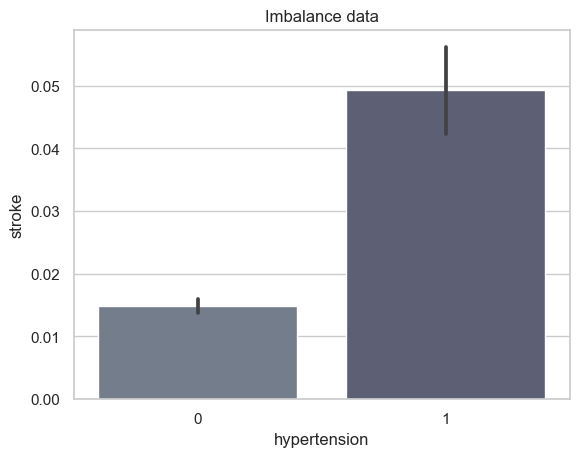

In [79]:
colors = plt.cm.bone([0.5, 0.4])  # Adjust the color intensity as needed

sns.barplot(x='hypertension',y="stroke", data=df,palette=colors)
plt.title("Imbalance data")
plt.show()

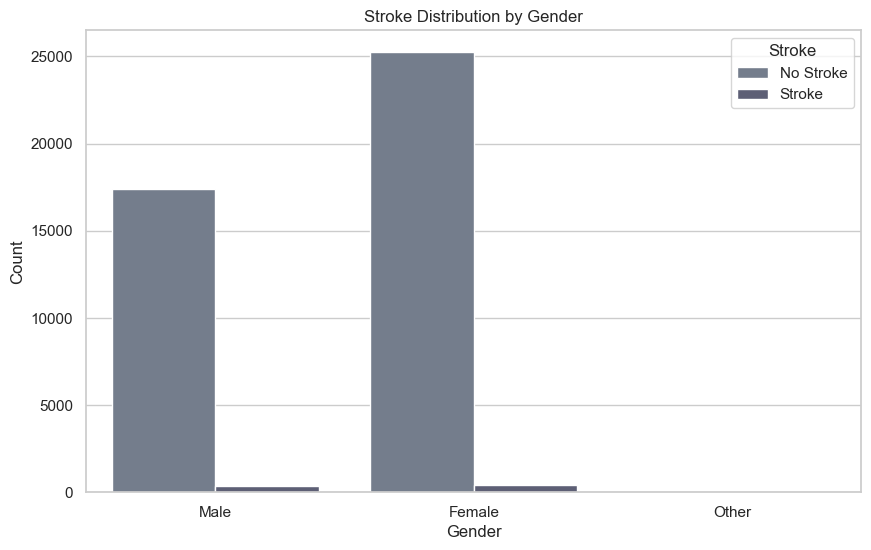

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of stroke by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


Text(0.5, 1.0, 'Percentage of Stroke AND Not Stroke')

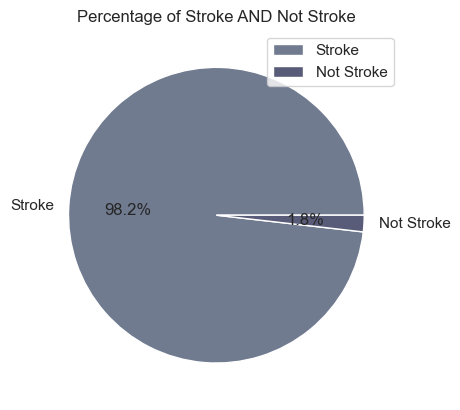

In [71]:
plt.pie(df["stroke"].value_counts().values, labels=["Stroke", "Not Stroke"], autopct= '%1.1f%%',colors=colors)
plt.legend(["Stroke", "Not Stroke"])
plt.title("Percentage of Stroke AND Not Stroke")



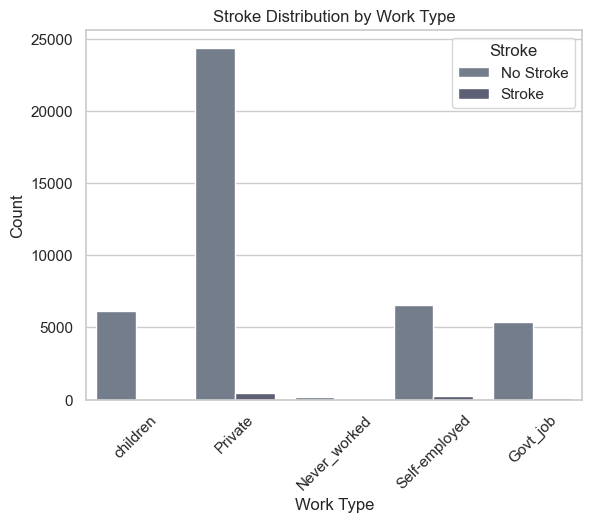

In [99]:
sns.countplot(x='work_type', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()


see how many null values in the class 1 

In [46]:
df[pd.isna(df["bmi"]) & pd.isna(df["smoking_status"]) & (df["stroke"] == 1)].count()


id                   50
gender               50
age                  50
hypertension         50
heart_disease        50
ever_married         50
work_type            50
Residence_type       50
avg_glucose_level    50
bmi                   0
smoking_status        0
stroke               50
dtype: int64

### I want to see if there is realtion between bmi , smoking with stroke 

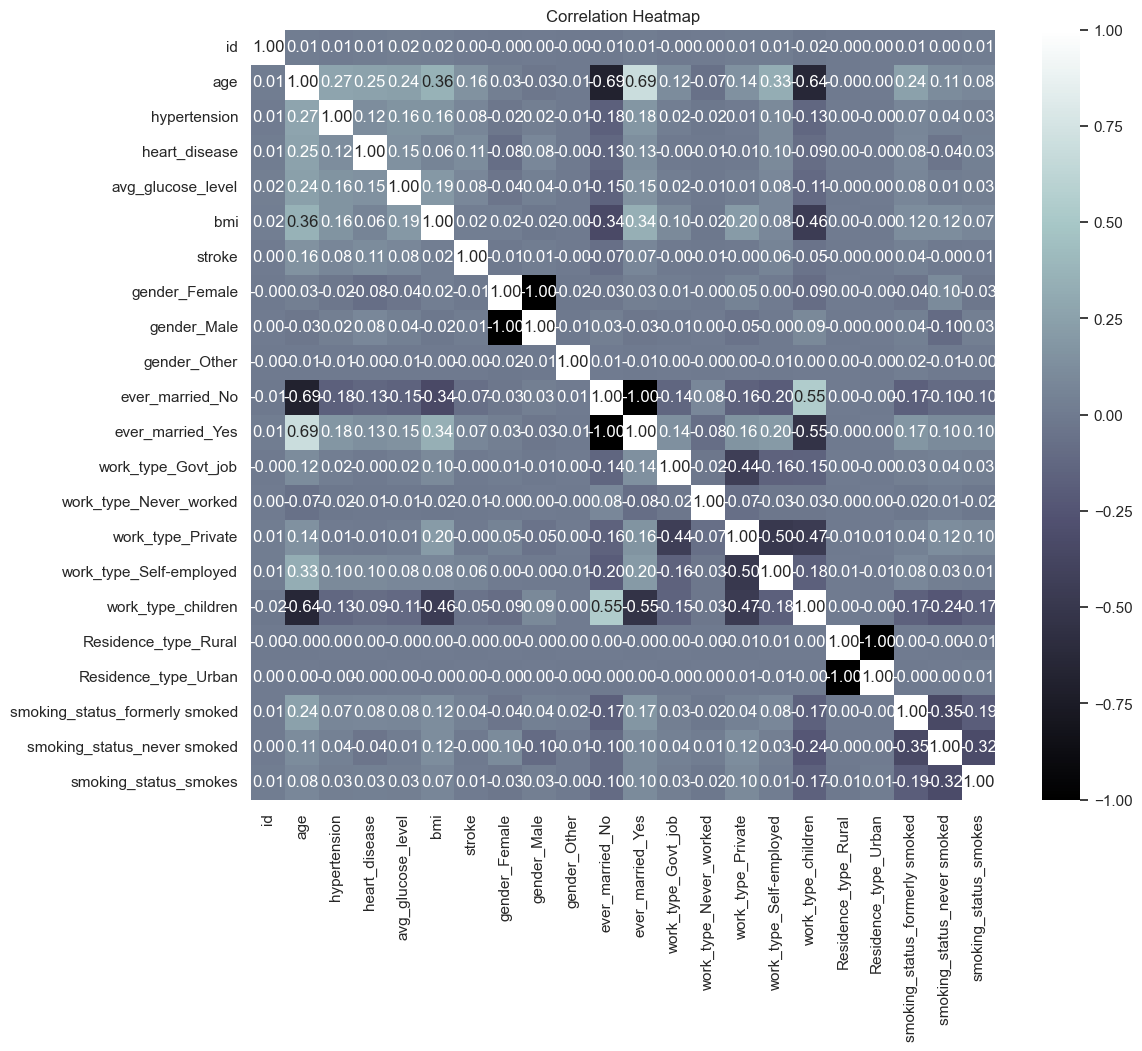

In [66]:
df_encoded = pd.get_dummies(df)


# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap( df_encoded.corr(), annot=True,cmap="bone", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing 

There are multiple ways we can use to deal with an values , we can either fill them with the mode , or create a models that will predict the null values(KNN , random forest ,...) , we will try multiple ones and see who give us better accuracy


# Handling BMI 

In [100]:
# Econding non ordinal category columns , hence we will use OneHotEncoder 

df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [101]:
#knn 
knn =  KNNImputer(missing_values=np.nan)
data = knn.fit_transform(df)
knn_data = pd.DataFrame(data , columns=df.columns)

In [102]:
knn_data.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [103]:
# or Interpolation , how to know which one is better ? 
interpolate_data = df.copy()
interpolate_data['bmi'] = interpolate_data['bmi'].interpolate(method='linear', limit_direction='both')


In [104]:
#check the shape after encoding 
df.shape

(43400, 22)

In [ ]:
# check possible featuer extraction 

# Model 

In [ ]:
# we will try the knn data first 
knn_data= knn_data .drop(columns=["id"])


In [ ]:
knn_data.shape

In [ ]:

"""
#Reverse the one-hot encoding
# Define the columns to be reversed
categorical_columns = {
    'gender': ['gender_Female', 'gender_Male', 'gender_Other'],
    'ever_married': ['ever_married_No', 'ever_married_Yes'],
    'work_type': ['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
    'Residence_type': ['Residence_type_Rural', 'Residence_type_Urban'],
    'smoking_status': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
}

for col, dummy_cols in categorical_columns.items():
    # Find the index of the max value in the dummy columns
    knn_data[col] = knn_data[dummy_cols].idxmax(axis=1)
    # Replace the column names with the original category names
    knn_data[col] = knn_data[col].apply(lambda x: x.split('_', 1)[1])

# Drop the dummy columns
knn_data.drop(columns=[col for cols in categorical_columns.values() for col in cols], inplace=True)

# Display the resulting DataFrame
print(knn_data)"""

In [ ]:
knn_data.shape

In [ ]:
knn_data.isnull().sum()

In [ ]:
X = knn_data.drop('stroke',axis=1)
y = knn_data['stroke']


In [ ]:
knn_data.max()

In [ ]:
knn_data.dtypes

In [ ]:
# Identify float columns
float_columns = knn_data.select_dtypes(include=['float64']).columns

# Apply MinMaxScaler only to float columns
scaler = MinMaxScaler()
knn_data[float_columns] = scaler.fit_transform(knn_data[float_columns])

# Separate features and target
X = knn_data.drop(columns=['stroke'])
y = knn_data['stroke']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X

In [ ]:
y.unique()

In [ ]:
X.isnull().sum()

# resourse for stacking classifier :https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))



XGB = XGBClassifier(random_state=13)

In [ ]:
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)

for name, model in estimators:
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name} training Accuracy: {train_accuracy:.2f}")
    print(f"{name} test Accuracy: {test_accuracy:.2f}\n")

print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(X_test, y_test):0.2f}")


## SMOTE


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

target_class_undersample = 0.0
target_class_oversample = 1.0
undersampler = RandomUnderSampler(sampling_strategy={target_class_undersample: int((knn_data[knn_data['stroke']==0].shape[0])/2)},random_state=42) # undersample the majority class by half

smote = SMOTE(sampling_strategy={target_class_oversample: int((knn_data[knn_data['stroke']==0].shape[0])/2)},random_state=42) # oversample the minority class by half of the undersampled class

x_resampled, y_resampled = undersampler.fit_resample(X, y)

x_resampled, y_resampled = smote.fit_resample(x_resampled, y_resampled)

print(f'New class distribution after resampling: {y_resampled.value_counts()}')

In [ ]:
knn_data[knn_data['stroke']==0].shape[0]/2

In [ ]:
knn_data.shape

In [ ]:
under= RandomUnderSampler(random_state=1)
X_under, y_under = under.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_under,y_under,test_size=0.3,random_state=1)
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") 

In [ ]:
class0 , class1 = df.stroke.value_counts()
df_class0=df[df["stroke"]==0]
df_class1=df[df["stroke"]==1]

In [ ]:
class0

In [ ]:
df_class0.shape

In [ ]:
df_class1.shape

In [ ]:
df_class0.sample(class1).shape

In [ ]:
df_class_0_under = df_class0.sample(class1)
df_class_0_under.shape

In [ ]:

from imblearn.over_sampling import SMOTE

over = SMOTE(random_state=1)
X_over, y_over = over.fit_resample(X,y)
"""
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)
print("OverSampling (SMOTE):")
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") 
    
    print(classification_report(y_test,y_pred))"""

In [ ]:
X_over.shape

In [ ]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

In [ ]:
for name, model in estimators:
    print(f"MODEL NAME: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n") 
    
    print(classification_report(y_test,y_pred))

# KNN 

# Smoking 

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Instantiate imputer for smoking_status
rfSmoke = RandomForestClassifier()
rfSmoke.fit(X_train, y_train)

y_pred_rf = rfSmoke.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


In [ ]:
#let try knn 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)



In [ ]:
# Create an imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on training data and transform both training and testing data
X_train_smoking_imputed = imputer.fit_transform(X_train)
X_test_smoking_imputed = imputer.transform(X_test)

# Instantiate your classifier
clf = RandomForestClassifier()  # Instantiate with appropriate hyperparameters

# Now you can train your model using X_train_smoking_imputed and y_train_smoking
clf.fit(X_train_smoking_imputed, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_smoking_imputed)

# Calculate accuracy
accuracy_imp = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_imp)